<a href="https://colab.research.google.com/github/kim-dahun/python-study/blob/main/py17_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터셋

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box plot

<Axes: ylabel='tip'>

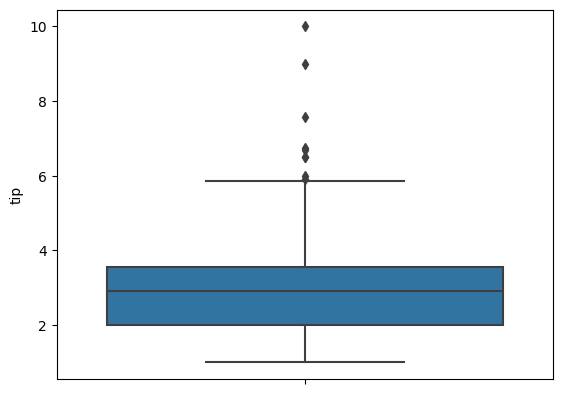

In [5]:
# tip 컬럼의 boxPlot

sns.boxplot(data=tips, y='tip')

<Axes: xlabel='tip'>

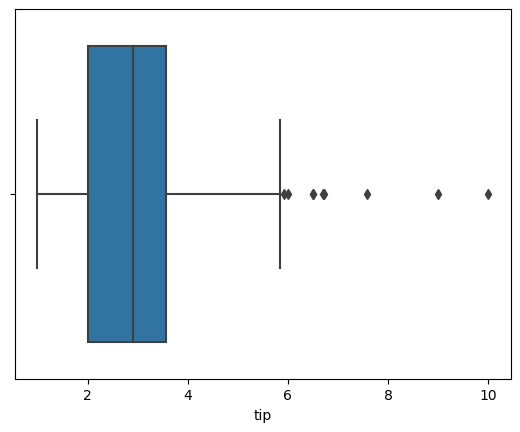

In [6]:
sns.boxplot(data=tips,x='tip')

## 그룹(카테고리)별 box plot

<Axes: xlabel='sex', ylabel='tip'>

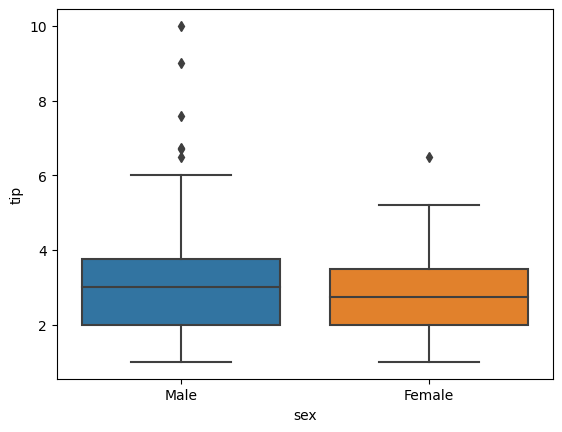

In [9]:
# 성별 tip의 box plot

sns.boxplot(data=tips,x='sex',y='tip')

<Axes: xlabel='tip', ylabel='sex'>

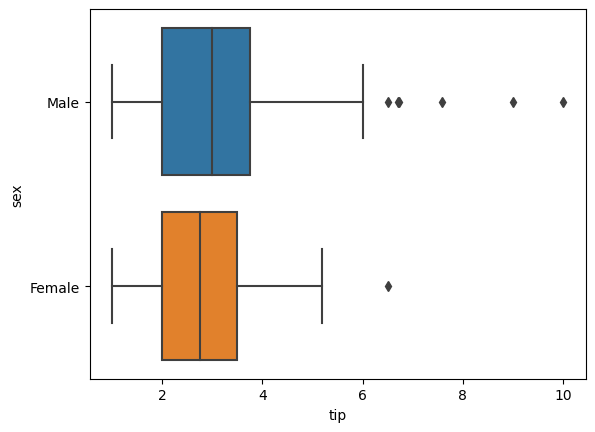

In [10]:
sns.boxplot(data=tips, x='tip', y='sex')

<Axes: xlabel='day', ylabel='tip'>

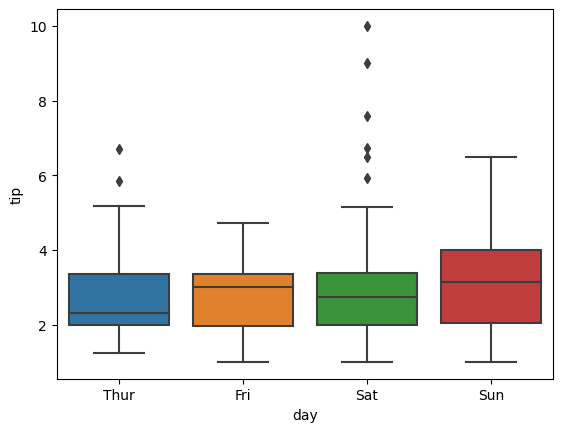

In [11]:
# 요일별 tip의 box plot

sns.boxplot(data=tips, x='day', y='tip')

* subplot 2개를 생성
* 각각 subplot에 흡연여부별 tips의 boxplot, 시간별 boxplot을 그리세요.

<Axes: xlabel='time', ylabel='tip'>

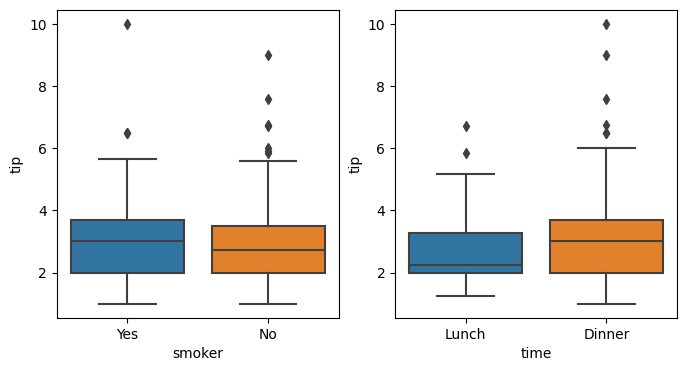

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

sns.boxplot(data=tips, x='smoker',y='tip',ax=ax[0])
sns.boxplot(data=tips, x='time',y='tip',ax=ax[1])

## `countplot()` 함수

카테고리 타입 변수의 빈도수를 막대로 표현한 그래프

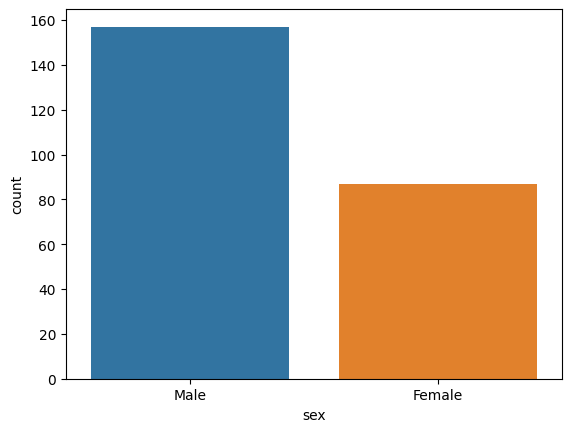

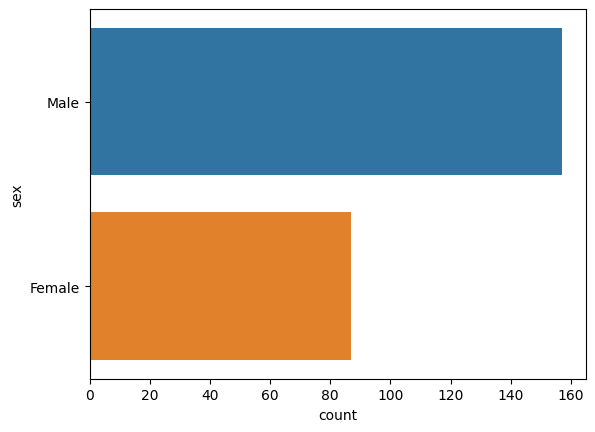

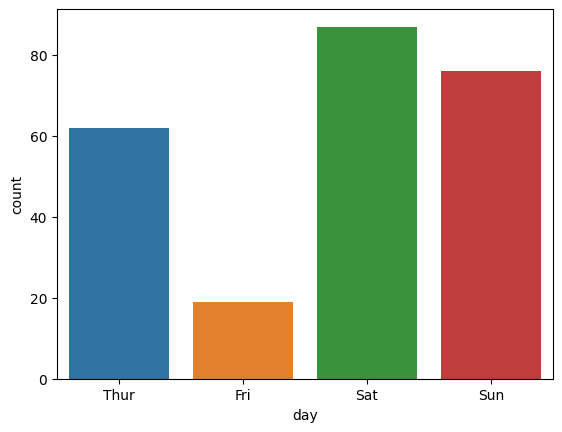

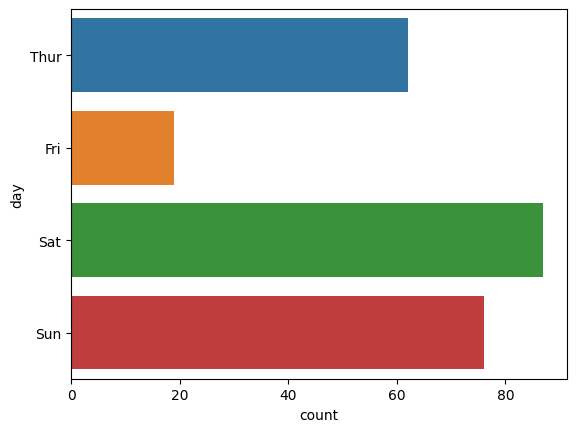

In [28]:
# 성별 빈도수 세로 막대 그래프

p1 = sns.countplot(data=tips, x='sex')
plt.show()
# 성별 빈도수 가로 막대 그래프

p2 = sns.countplot(data=tips, y='sex')
plt.show()

# 요일 빈도수 막대 그래프
sns.countplot(data=tips, x='day')
plt.show()

sns.countplot(data=tips, y='day')
plt.show()

In [31]:
# 요일별 성별 빈도수

tips.groupby(['day','sex']).tip.count()

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

<Axes: xlabel='day', ylabel='count'>

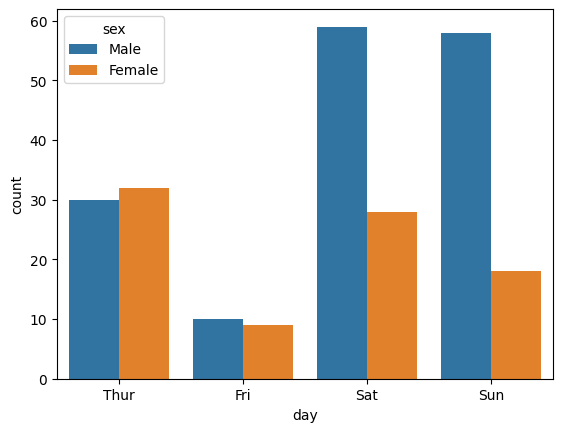

In [32]:
sns.countplot(data=tips, x='day', hue='sex')

# hue 파라미터 : 그룹(카테고리) 별로 다른 색깔을 설정할 때 사용.

<Axes: xlabel='sex', ylabel='count'>

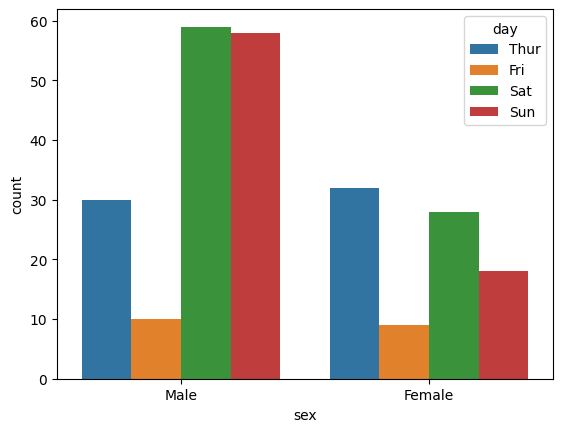

In [33]:
sns.countplot(data=tips, x='sex', hue='day')

<Axes: xlabel='sex', ylabel='count'>

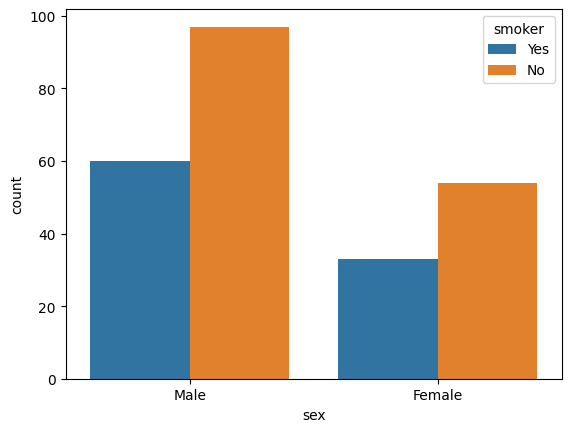

In [34]:
# 성별, 흡연여부별 빈도수

sns.countplot(data=tips, x='sex', hue='smoker')

## `barplot()` 함수

* 그룹(카테고리) 별로 변수의 통계량(평균, 표준편차, 최대최소값, 중위값... )을 막대그래프로 표현.
* pyplot 모듈의 barplot과는 전혀 다름.
* 통계량 계산 함수의 기본값은 평균.
* 카테고리 타입 변수와 숫자타입 변수를 함께 시각화.

In [35]:
# 성별 tip의 평균

tips.groupby(tips.sex)['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

<Axes: xlabel='sex', ylabel='tip'>

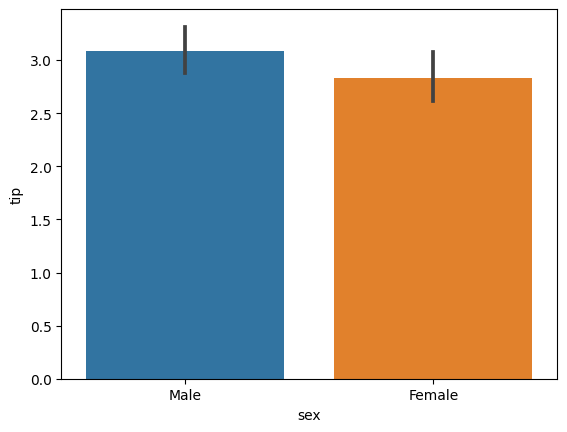

In [42]:
sns.barplot(data=tips, x='sex',y='tip',estimator='mean') #estimator='mean' 기본값, 평균계산

<Axes: xlabel='sex', ylabel='tip'>

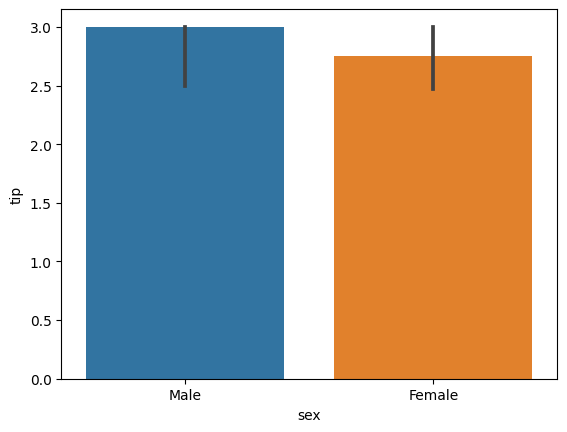

In [44]:
sns.barplot(data=tips, x='sex',y='tip',estimator='median') #estimator='mean' 기본값, 평균계산

<Axes: xlabel='smoker', ylabel='tip'>

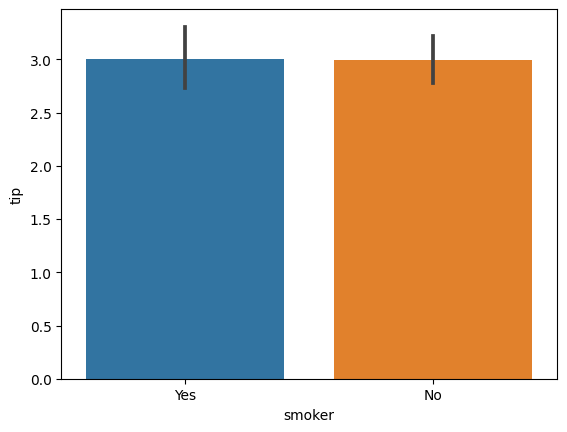

In [45]:
# 흡연여부별 Tip의 평균을 시각화.

sns.barplot(data=tips, x='smoker',y='tip',estimator='mean')

<Axes: xlabel='sex', ylabel='tip'>

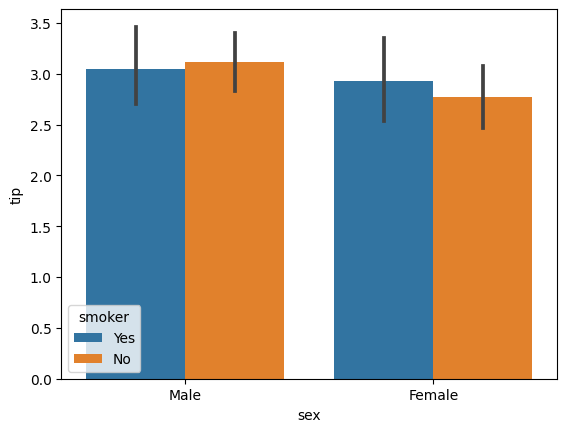

In [46]:
# 성별 흡연여부별 tip의 평균을 시각화

sns.barplot(data=tips, x='sex', hue='smoker', y='tip')

# 산점도 : `scatterplot()`

* tip ~ total_bill 산점도

* 성별에 따라 점의 색깔이 다른 산점도

<Axes: xlabel='tip', ylabel='total_bill'>

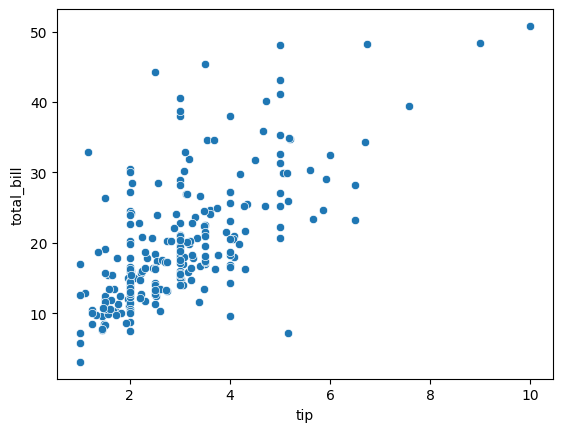

In [47]:
sns.scatterplot(data=tips, x='tip',y='total_bill')

<Axes: xlabel='tip', ylabel='total_bill'>

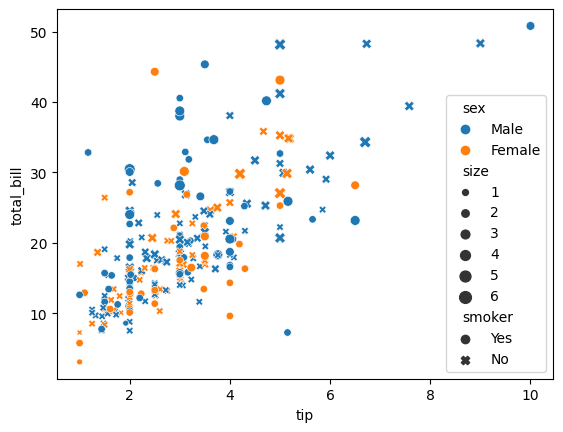

In [62]:
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='sex', style='smoker', size='size')

<Axes: xlabel='tip', ylabel='total_bill'>

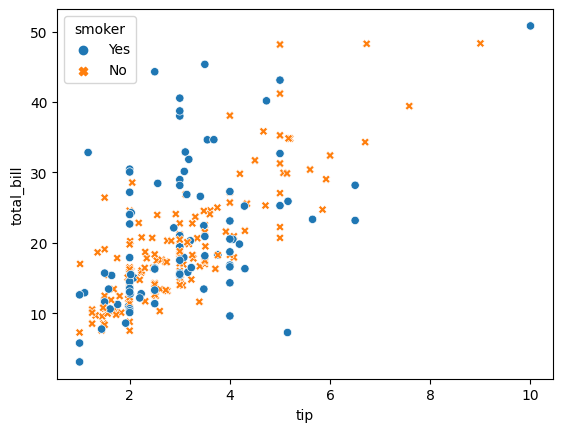

In [61]:
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='smoker', style='smoker')

<Axes: xlabel='tip', ylabel='total_bill'>

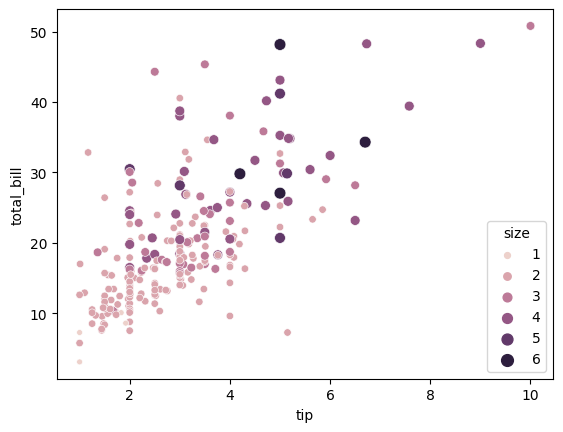

In [58]:
sns.scatterplot(data=tips, x='tip', y='total_bill',hue='size', size='size')

# 카테고리 그래프 : `catplot()`

카테고리 별로 subplot 들을 생성하고, 통계값(평균,중앙값, ...) 계산해서, 각각 subplot에 같은 종류의 그래프를 그려줌.

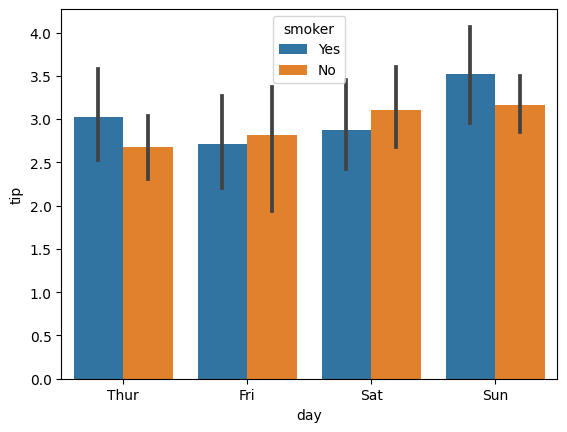

In [63]:
# 요일별, 흡연여부별 TIp의 평균을 막대그래프로 표현.

sns.barplot(data=tips, x='day',y='tip', hue='smoker')
plt.show()

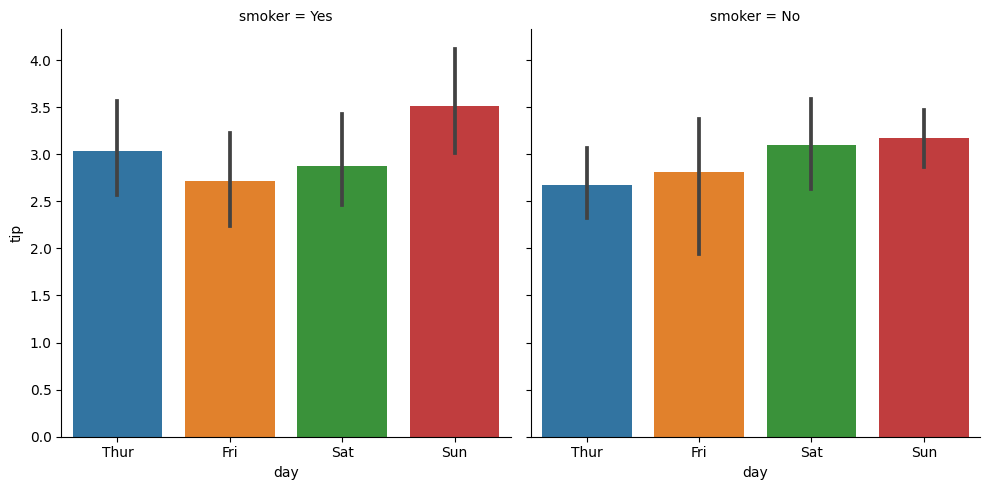

In [70]:
sns.catplot(data=tips, x='day', y='tip', col='smoker', kind='bar')

##EX1.

* 요일별 팁의 평균 막대 그래프
* 시간(Lunch, Dinner) 별로 SubPlot을 생성.

##EX2.

* 요일별 팁의 평균 막대 그래프
* 흡연여부 별 Subplot 생성
* 시간 별 SubPlot 생성

##EX3.

* 요일별, 성별 팁의 막대 그래프
* 시간별로 SubPlot

##EX4.

* 성별, Tip의 BoxPlot
* Category 는 요일별로 SubPlot만들기


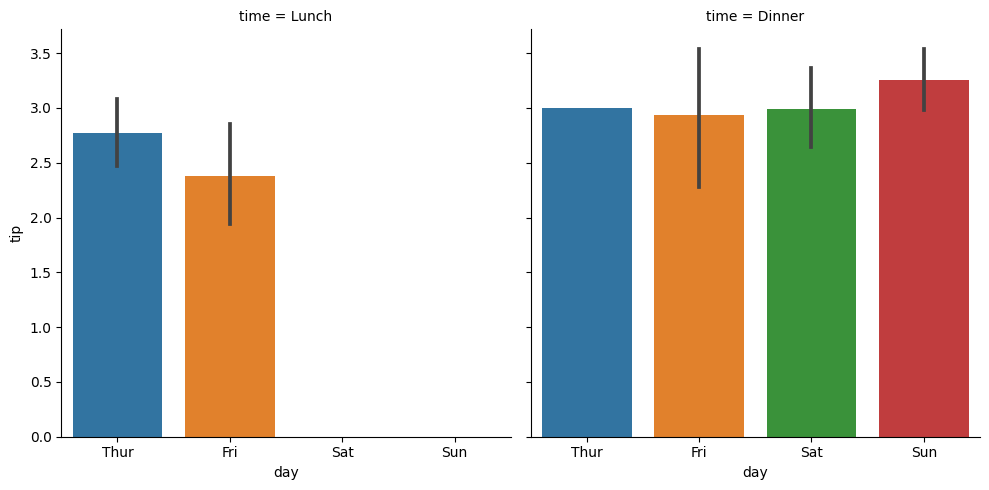

In [72]:
sns.catplot(data=tips, x='day', y='tip', col='time', kind='bar')

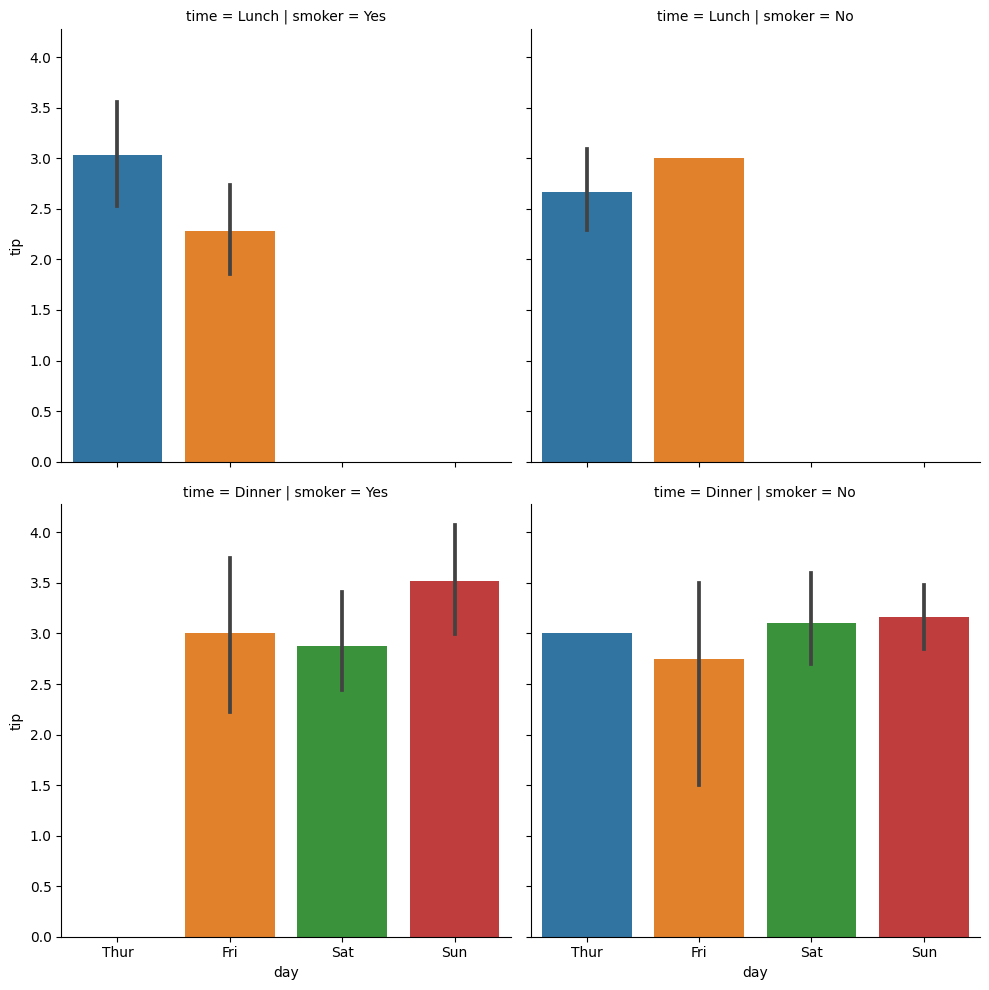

In [73]:
sns.catplot(data=tips, x='day',y='tip',col='smoker',row='time', kind='bar')

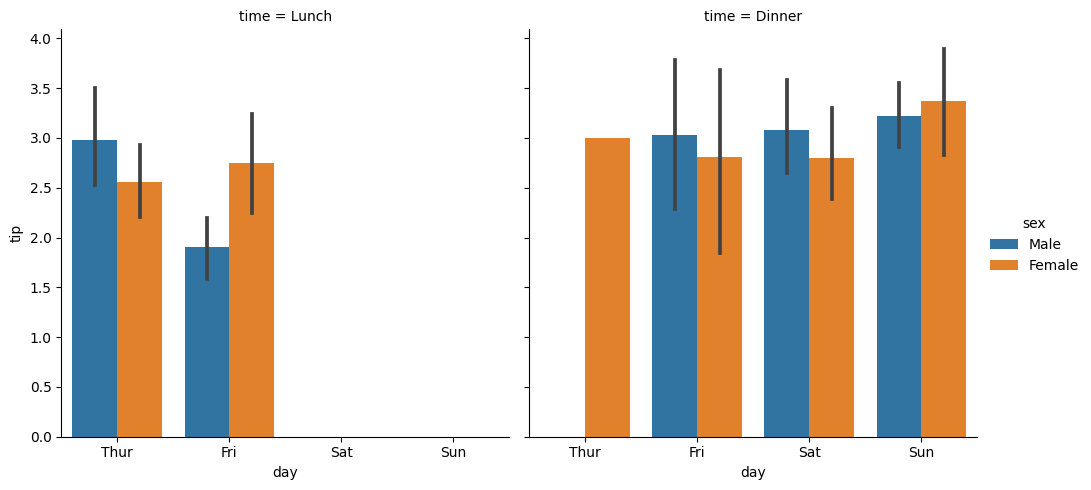

In [75]:
sns.catplot(data=tips,x='day',hue='sex',y='tip',col='time', kind='bar')

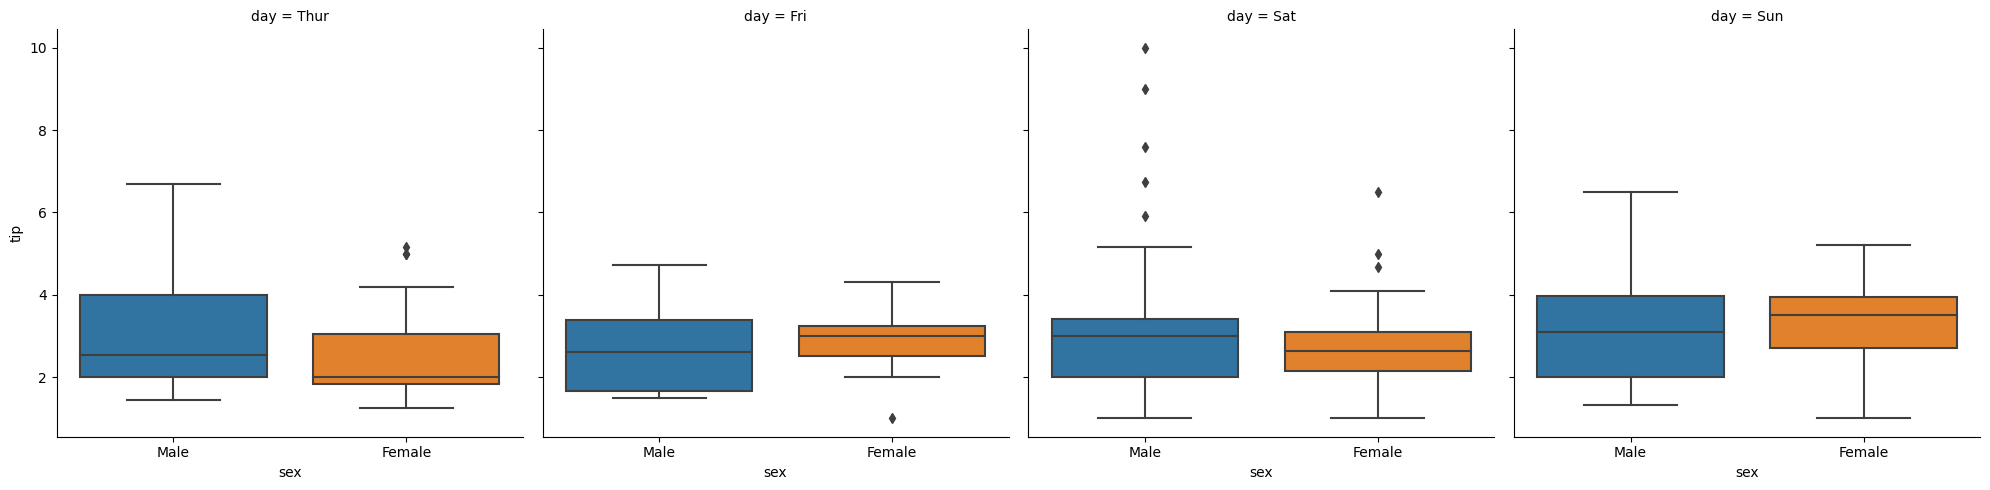

In [76]:
sns.catplot(data=tips, x='sex', y='tip', col='day', kind='box')